# Capstone Project 2: Lending Club

# Logistic Regression

In [190]:
import pandas as pd #for building pandas dataframes for analysis
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np #fundamental package for scientific computing with Python

import matplotlib.pyplot as plt #for visualizations
import seaborn as sns #for neat visualizations
import scipy.stats as stats #large number of probability distributions and statistical functions
import statsmodels as sm #provides estimation of many different statistical models, tests and data exploration 
import patsy as p
import brewer2mpl as b

from ggplot import *
%matplotlib notebook
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [191]:
#Cleaned Approved Data Separated
approved2 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/approved22018-08-14.csv')
approved2.head()

,loan_status_separated,verification_status_separated_0,verification_status_separated_1,grade_separated_1,grade_separated_2,grade_separated_3,grade_separated_4,grade_separated_5,grade_separated_6,grade_separated_7,home_ownership_separated_0,home_ownership_separated_1,emp_length_separated_0,emp_length_separated_1,emp_length_separated_10,emp_length_separated_2,emp_length_separated_3,emp_length_separated_4,emp_length_separated_5,emp_length_separated_6,emp_length_separated_7,emp_length_separated_8,emp_length_separated_9,term_separated_0,term_separated_1
0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [192]:
#Cleaned Approved Data
#approved1 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/approved2018-08-14.csv')
#approved1.head()

### Feature Selection

In [193]:
#data_final_vars=approved2.columns.values.tolist()
#y=['loan_status_separated']
#X=[i for i in data_final_vars if i not in y]

In [194]:
df = approved2.values

In [195]:
X = approved2.drop('loan_status_separated', axis = 1)
y = approved2.loan_status_separated

### Implementing the Model

In [201]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y,X)
#result=logit_model.fit()
#print(result.summary())

### Logistic Regression Test/Train Split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [234]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78446


### Tuning the Model with Cross Validation 

In [220]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, X, y, score_func=accuracy_score):
    result = 0
    nfold = 10
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X.iloc[train], y.iloc[train]) # fit
        result += score_func(clf.predict(X.iloc[test]), y.iloc[test]) # evaluate score function on held-out data
    return result / nfold # average

In [221]:
clf = LogisticRegression()
score = cv_score(clf, X_train, y_train)
print(("10-fold cross validation average accuracy: %.3f" % (score)))

10-fold cross validation average accuracy: 0.782


The average accuracy is very close to the logistric regression classifier so we can conclude the model generalizes well.

### Grid of Parameters to Select Feature C

In [222]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

scores = [0.001, 0.1, 1, 10, 100]
for c in Cs:
    clf = LogisticRegression(C = c)
    score = cv_score(clf, X_train, y_train)
    scores.append(score)
    print(str(c)+":\t"+str(score))

# the highest value of 'c' in Cs
c = Cs[np.argmax(scores)]
print(c)

0.001:	0.780744302747
0.1:	0.781796816792
1:	0.781887553484
10:	0.781873943721
100:	0.781873943721
100


The best regularization parameter for c is 1. Althought 10 and 100 come in close. The purpose for this parameter is tuning unlikely high regression coefficients, preventing features from having terribly high weights.

### Testing C on Logistic Regression Data

In [223]:
# your turn
clf = LogisticRegression(C=c)
# Fit the model on the test data.
clf.fit(X_train, y_train)
print("Training set accuracy:\t"+str(accuracy_score(clf.predict(X_train), y_train)))
# Print the accuracy from the testing data.
print("Test set accuracy:\t"+str(accuracy_score(clf.predict(X_test), y_test)))

Training set accuracy:	0.781923846423
Test set accuracy:	0.784475001852


The parameter C had no improvement on the score, it remains the same. This is because the default tuner for c is 1! Since this is only fit on one set of data we will next fit Cross-validation and grid search on several sets of training data to find the optimal parameter to use on the test set.

### Grid Search CV

In [224]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
param_grid = {'C':Cs}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
print("BEST PARAM:",logreg_cv.best_params_)
print("Accuracy Score:", accuracy_score(logreg_cv.predict(X_test), y_test))

BEST PARAM: {'C': 0.1}
Accuracy Score: 0.784475001852


The best parameter choosen was 0.1 when testing on multiple data sets.

### Confusion Matrix

In [225]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 1839 18839]
 [ 1522 72267]]


### Precision, Recall, F-Measure & Support

In [226]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.55      0.09      0.15     20678
          1       0.79      0.98      0.88     73789

avg / total       0.74      0.78      0.72     94467



Precision tells us what percent described as defaulted or paid were actually defaulted or paid. In this case the precision is 0.79 precise for paid but only 0.54 for defaulted. This means it is more precise for predicting paid loans.

Recall or sensitivity tells us what portion of those that defaulted or were paid were actually shown with the model as defaulted or paid. For example it takes the true positive divided by the true positive and false negative. The recall for those paid is 98 percent but for those that defaulted it is 9 percent. This shows an error in our model. The model does not predict well what we are looking for. 

The f-measure tries to take on a harmonic mean between the precision and recall score to create one value to represent both and create a red flag if the model is not performing well. This gives us 88 percent for paid and 15 percent for defaulted. This supports our findings above that the model does not do well representing defaulted loans. 

The support is the number of occurrences of each class in the test set. As we can see the number of instances of defaulted loans was 20678 and the paid loans was 73789 in our test set. This shows we have a large difference in instances of each for classification with an almost 1:3 ratio. This could suggest we have an imbalanced classification problem. 

### ROC Curve

"The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)."

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.fit(X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

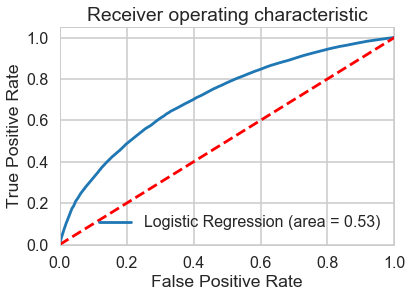

In [230]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. The area under the curve is 0.53 which is extremely close to 0.5. When AUC is approximately 0.5, the model has no discriminating capacity and is a poor model.